In [1]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain

In [2]:
# libraries
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.preprocess.feature import Feature
import matplotlib.pyplot as plt

In [3]:

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')

In [4]:
genres=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
X,y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

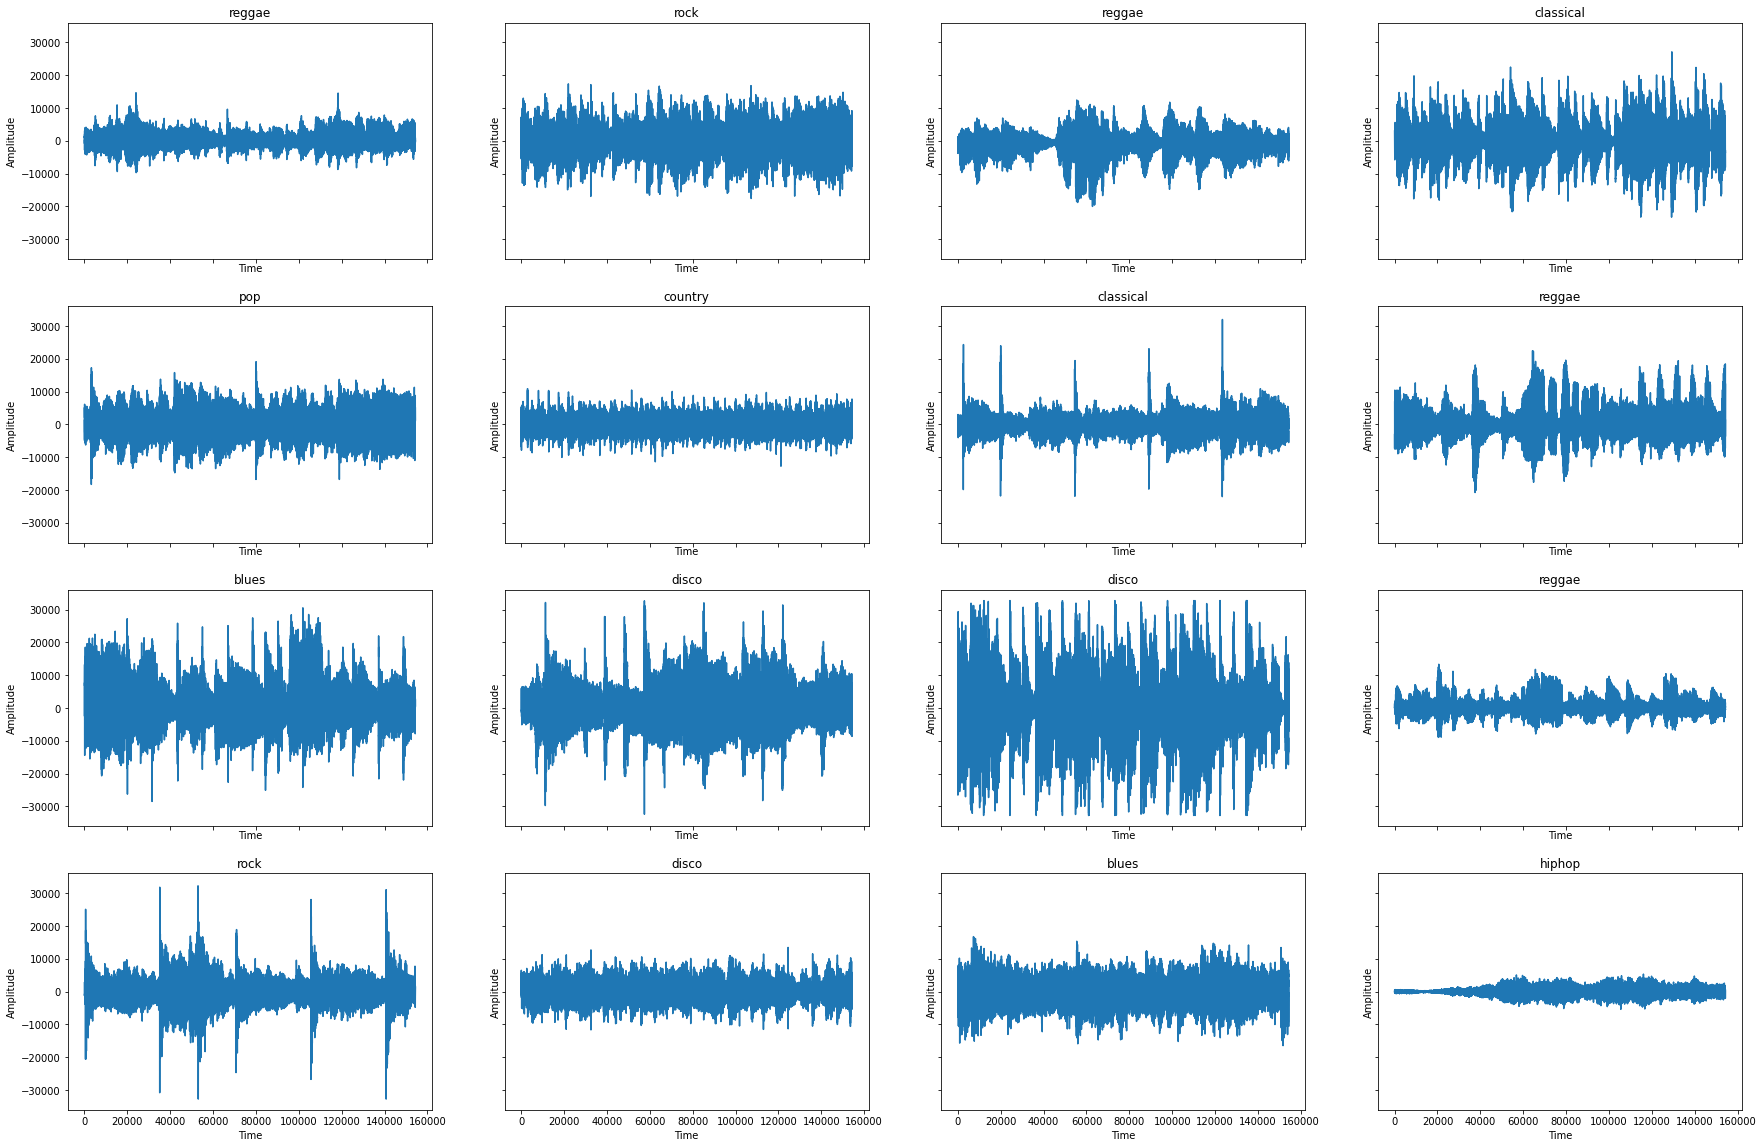

In [9]:
ncol = 4
nrow = 4
X_train = X[:nrow*ncol]
y_train = y[:nrow*ncol]
fig, axes = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(30,20))
for x_t, y_t, ax in zip(X_train, y_train, axes.flat):
    ax.set_title(genres[y_t])
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    img = ax.plot(x_t)

In [17]:
feature_maker = Feature()
X_sample = feature_maker.torch_fbank_features(X[:nrow*ncol]).transpose(1,2)

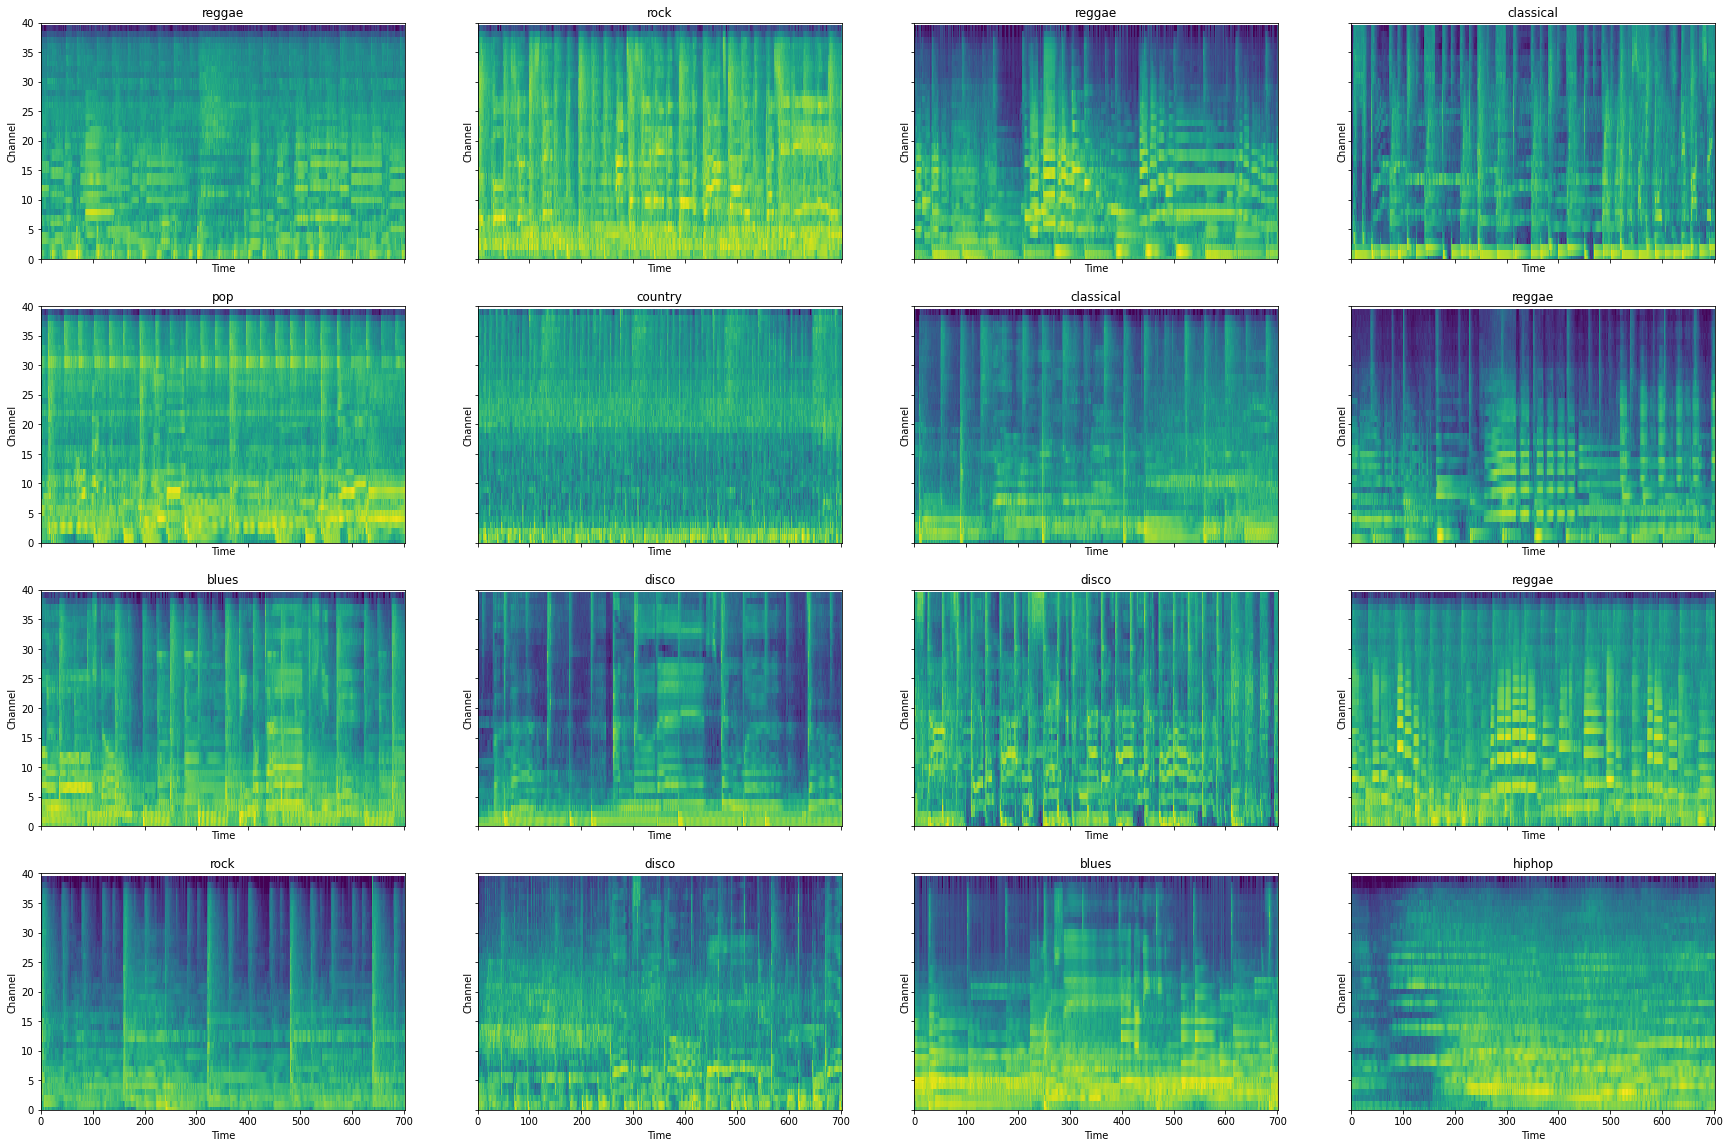

In [21]:


fig, axes = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(30,20))
plt.xlim([0, 702])
plt.ylim([0, 40])
for x_f, y_t, ax in zip(X_sample, y, axes.flat):
    ax.set_title(genres[y_t])
    ax.set_xlabel('Time')
    ax.set_ylabel('Channel')
    img = ax.imshow(x_f, cmap='viridis', interpolation='nearest', aspect='auto')